<a href="https://colab.research.google.com/github/MalihaUCF/Machine-Learning-Course-Assignments-Spring-2019/blob/master/Assignment%202/Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Loading CIFAR-10 dataset

from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np
import keras


#creating train,validate and test sets
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(train_images,train_labels,test_size=0.20,stratify=train_labels)#, random_state=42)

print(train_images.shape)
print(X_train.shape)
print(X_val.shape)
print(test_images.shape)


train_images=np.array(train_images)
x_train=train_images[0:40000]
x_val=train_images[40000:]

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)



num_classes=10
# Convert class vectors to binary class matrices.
test_labels = keras.utils.to_categorical(test_labels, num_classes)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val=keras.utils.to_categorical(y_val, num_classes)


print(y_val.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 64s 0us/step
(50000, 32, 32, 3)
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 1)
(10000, 10)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Not using data augmentation.
Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 23s 577us/step - loss: 1.8182 - acc: 0.3335 - val_loss: 1.5378 - val_acc: 0.4408
Epoch 2/30
40000/40000 [==============================] - 28s 695us/step - loss: 1.5031 - acc: 0.4529 - val_loss: 1.3623 - val_acc: 0.5148
Epoch 3/30
40000/40000 [==============================] - 45s 1ms/step - loss: 1.3835 - acc: 0.5015 - val_loss: 1.2819 - val_acc: 0.5532
Epoch 4/30
40000/40000 [==============================] - 38s 962us/step - loss: 1.2964 - acc: 0.5348 - val_loss: 1.2217 - val_acc: 0.5734
Epoch 5/30
40000/40000 [==============================] - 36s 888us/step - loss: 1.2155 - acc: 0.5690 - val_loss: 1.1265 - val_acc: 

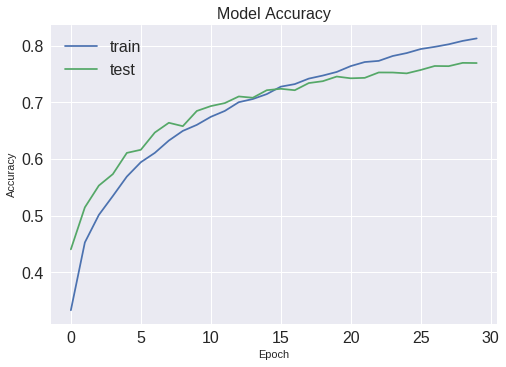

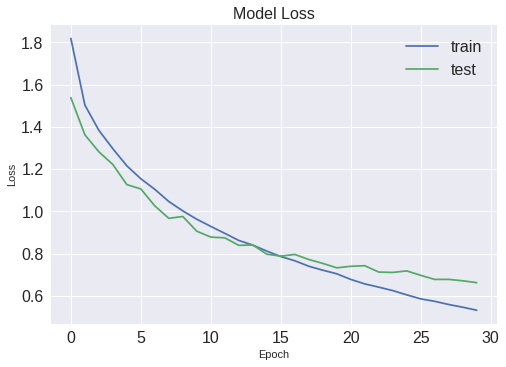

Confusion Matrix


[[887  22   3   7   0   3   1  13  37  27]
 [ 24 897   0   3   0   2   1   5  29  39]
 [236  27 332  85  10  98   8 118  42  44]
 [132  30  18 352   4 226  13 100  67  58]
 [174  27  32  66 184 109  17 291  38  62]
 [ 69  17   7  70   2 647   6 129  15  38]
 [ 90  67  28  88   3  62 439  61  81  81]
 [ 49  15   4  10   1  33   0 830   7  51]
 [162  37   0   6   0   1   0  11 757  26]
 [ 63  95   0   4   0   2   0  13  11 812]]
              precision    recall  f1-score   support

           0       0.89      0.47      0.61      1886
           1       0.90      0.73      0.80      1234
           2       0.33      0.78      0.47       424
           3       0.35      0.51      0.42       691
           4       0.18      0.90      0.31       204
           5       0.65      0.55      0.59      1183
           6       0.44      0.91      0.59       485
           7       0.83      0.53      0.65      1571
           8       0.76      0.70      0.73      1084
         

In [0]:
batch_size = 32
epochs = 30
data_augmentation = False
num_predictions = 20
#save_dir = os.path.join(os.getcwd(), 'saved_models')
#model_name = 'keras_cifar10_trained_model.h5'



from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


#Model with 2 conv blocks and 4 conv layers with 2 fc layers and dropout
def model1():
  

  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  
  return model


#increased number of blocks/layers
def model2():
  

  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same',
                   input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(256, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(256, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  model.add(Dense(1024))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  
  return model

#no dropout
def model3():
  

  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  
  return model



#more filters , rest same as model 1
def model4():
  

  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same',
                   input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  
  return model


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# using SGD
sgd=keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)

#using ADAM
Adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


#using adgrad
adagrad=keras.optimizers.Adagrad(lr=0.001, epsilon=None, decay=0.0)


#use mse as loss as well categorical_crossentropy


#Calling model1
model=model1()

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_val /= 255


# option of data augmentation 
if not data_augmentation:
    print('Not using data augmentation.')
    history=model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_val, y_val),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
    
    datagen.fit(X_train)

    

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(X_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,steps_per_epoch=100,validation_steps=50,
                        validation_data=(X_val, y_val))
                        


# Score trained model.
scores = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys(),'\n\n\n')



SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n\n')

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


#finding confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
import os
from keras.models import load_model


y_pred=model.predict(test_images) 
y_pred = [np.argmax(entry) for entry in y_pred]
y_true = [np.argmax(entry) for entry in test_labels]

print('Confusion Matrix\n\n')
print(confusion_matrix(y_true, y_pred))  

print(classification_report(y_pred,y_true))

In [0]:
#Saving the model as an h5 file

good_model='adam_dropout_hold_out.h5'
model.save(good_model)

In [0]:
!ls

sample_data


In [0]:
from google.colab import files

with open(good_model, 'r') as f:
  files.download(good_model)